The project idea and summury the project - بلال عبد الرحمن فكري عبد الحميد -  20211014 

preprocessing from line 1 to 12 - 20211271 - مؤمن كامل احمد

polarity from line 13 to 18 - عبد الرحمن محمد محمد سعيد - 20211165    

visualization from line 19 to 26 - 20211123 - بولا میلاد محروس 

model from line 27 to the end - 20211030 - سيف علاء الدين عبد الحميد  

project link : https://drive.google.com/file/d/1ZNWlq3vCX-T8ZaxK05TFgUFejdSIBSz-/view?usp=sharing

In [1]:
import pandas as pd
df = pd.read_csv('vaccination_tweets.csv')

In [2]:
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [4]:
##Drop all unimportant columns
text_df = df[["text"]]

In [5]:
#Drop duplicates
text_df = text_df.drop_duplicates('text')

In [6]:
text_df.isna().sum()

text    0
dtype: int64

In [7]:
column_name = 'text'
has_numeric_values = pd.to_numeric(df[column_name], errors='coerce').notnull().any()

if has_numeric_values:
    print("There are numeric values in the column.")
else:
    print("There are no numeric values in the column.")

There are no numeric values in the column.


In [8]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8075 entries, 0 to 8081
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8075 non-null   object
dtypes: object(1)
memory usage: 126.2+ KB


In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text = text.lower()                                                        #Make all letters lowercase
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)     #removing URLs
    text = re.sub(r'\@w+|\#','',text)                                          #removing special characters
    text = re.sub(r'[^\w\s]','',text)                                          #removing what is not a word character
    text_tokens = word_tokenize(text)                                          #tokenizing the text
    filtered_text = [w for w in text_tokens if not w in stop_words]            #removing all stop words
    return " ".join(filtered_text)

In [10]:
#Aplly the fanction above
text_df.text = text_df['text'].apply(data_processing)

In [11]:
#lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
for i in text_df['text'] :
    lemm_word = lemmatizer.lemmatize(i)

In [12]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [13]:
#Measures the sentiment polarity of a given text (positive, negative, or neutral) in numbers.
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
#Aplly polarity
text_df['polarity'] = text_df['text'].apply(polarity)

In [15]:
text_df.head()

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0


In [16]:
#Labels each text as 'Positive', 'Negative', or 'Neutral' based on the polarity score.
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [17]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [18]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

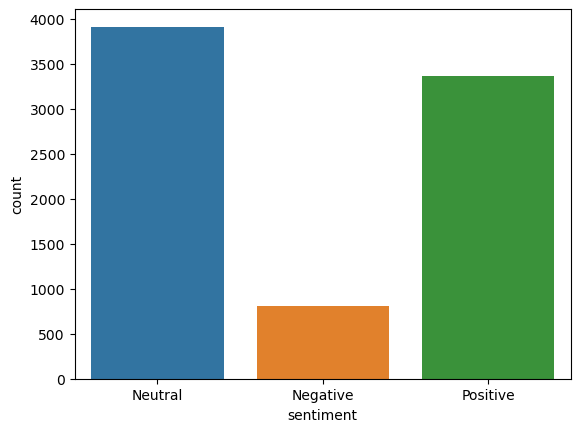

In [19]:
#Visualizes the distribution of sentiments using seaborn
import seaborn as sns

sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

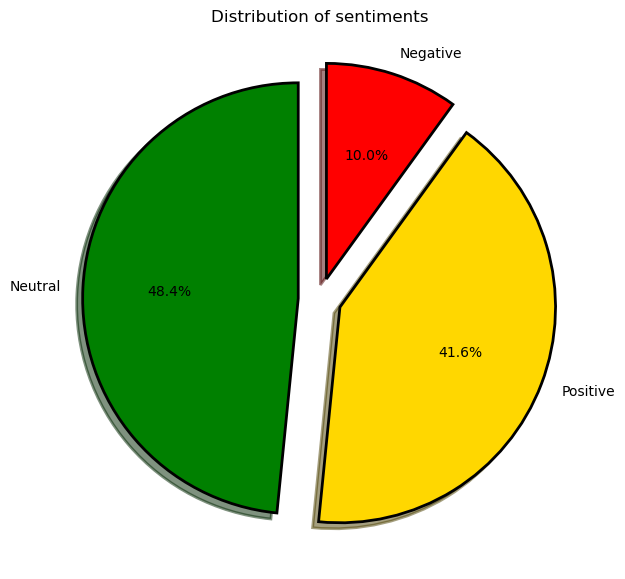

In [20]:
#Visualizes the distribution of sentiments using matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
colors = ("green", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [21]:
# Visualize the most frequent words in positive tweets
from wordcloud import WordCloud

pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
3788,saw awesome comparison pfizer vaccine vs moder...,1.0,Positive
1671,one best christmas gifts ive ever received par...,1.0,Positive
5542,best gift valentinesday2021 gift valentinesday...,1.0,Positive
7859,excellent news israel pfizerbiontech pfizervac...,1.0,Positive
5534,syappa mukka done dusted best thing happened m...,1.0,Positive


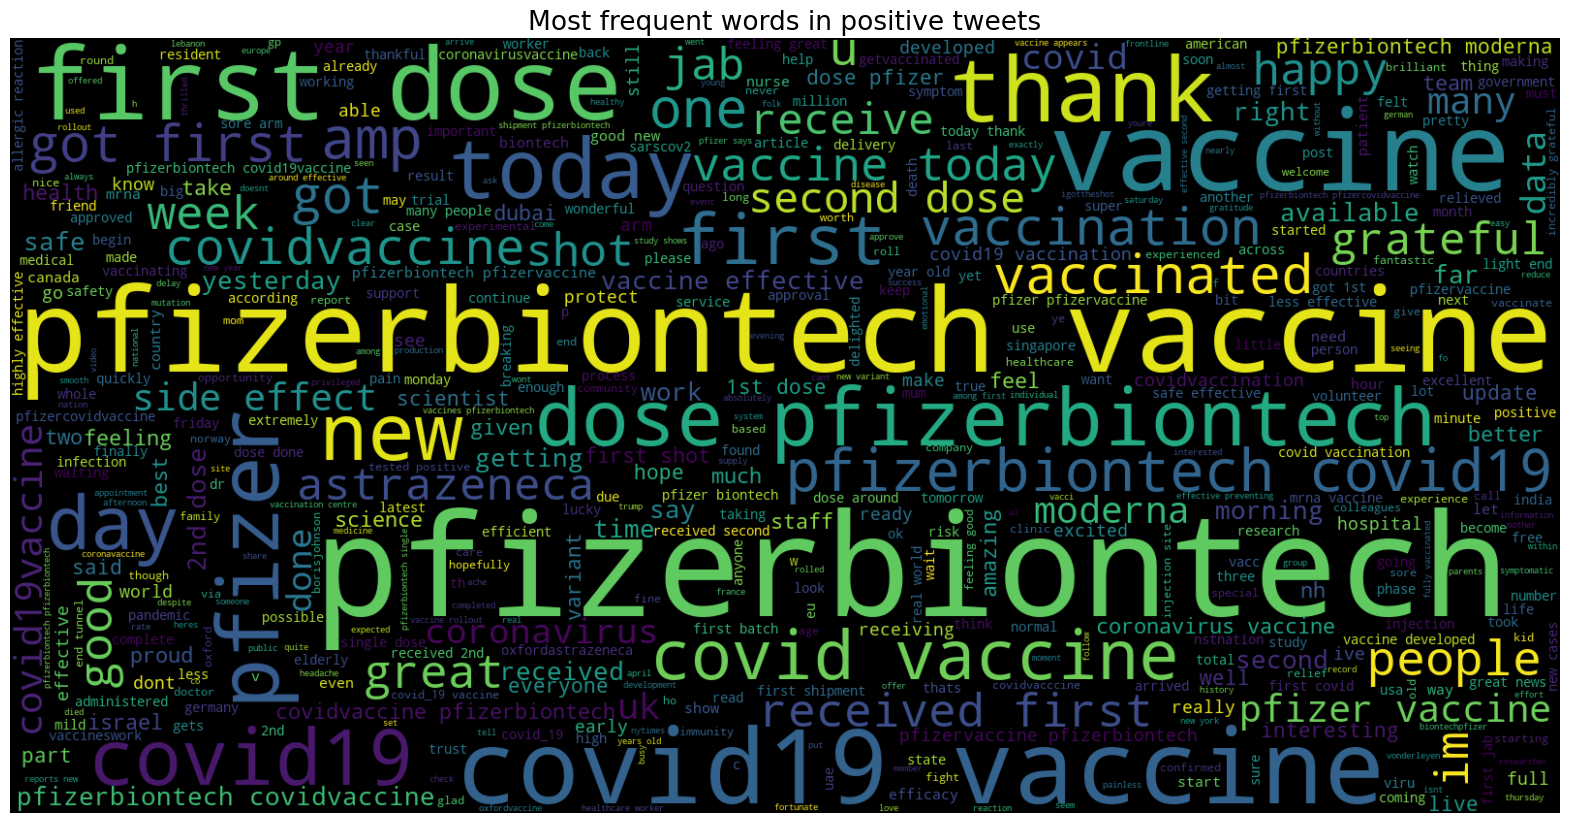

In [22]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [23]:
# Visualize the most frequent words in negative tweets

neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


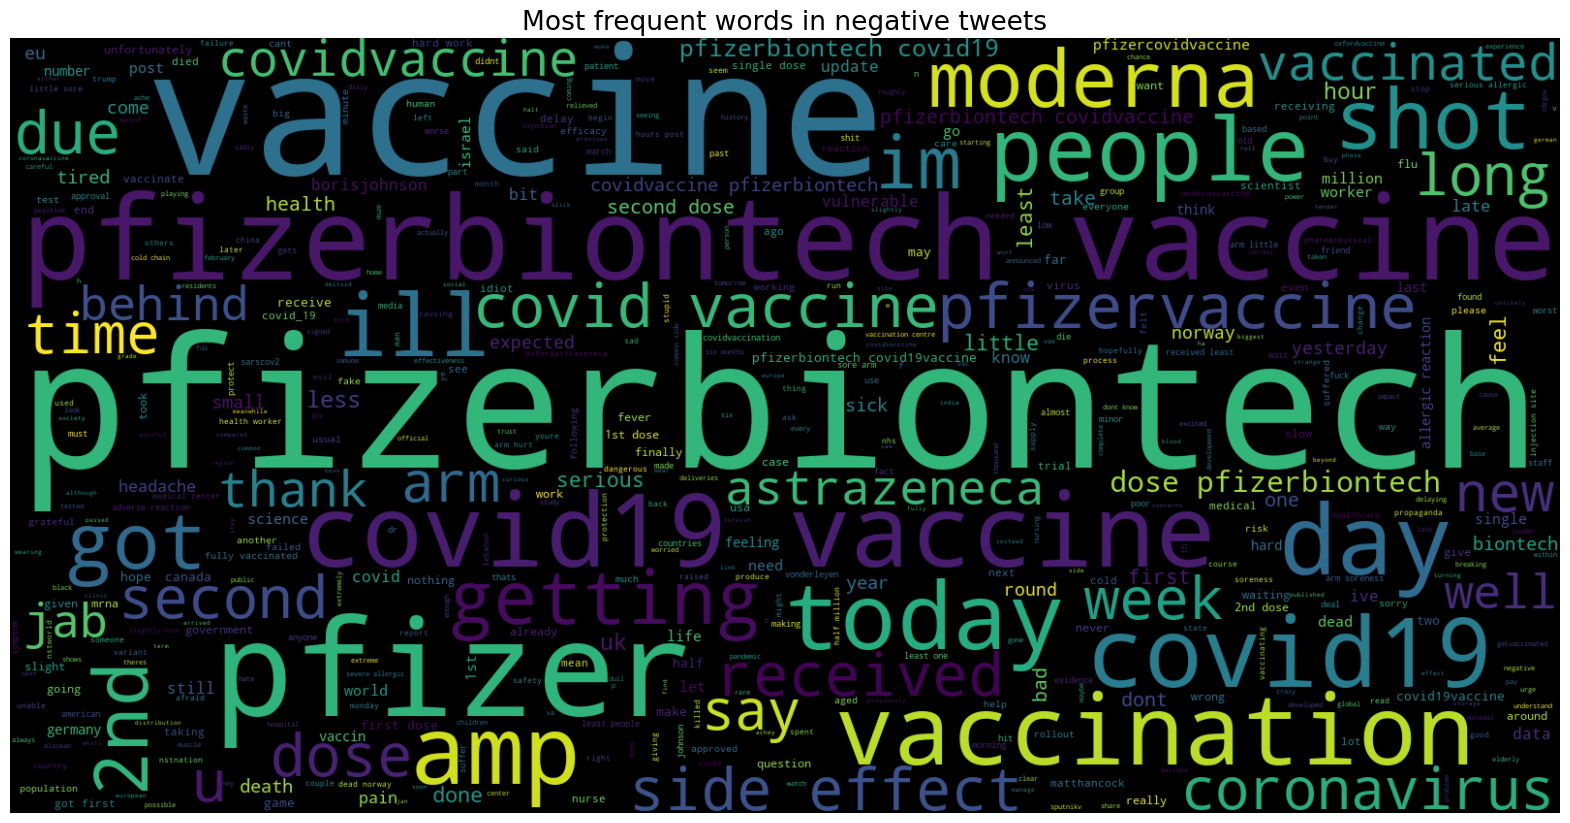

In [24]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [25]:
# Visualize the most frequent words in neutral tweets

neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
5334,western cape procure vaccine privately fundedp...,0.0,Neutral
5338,bbcnews media info simple terms uk using 2 pri...,0.0,Neutral
5340,recently published mhra vaccine adr data repor...,0.0,Neutral
5341,us administers 412 million doses covid19 vacci...,0.0,Neutral


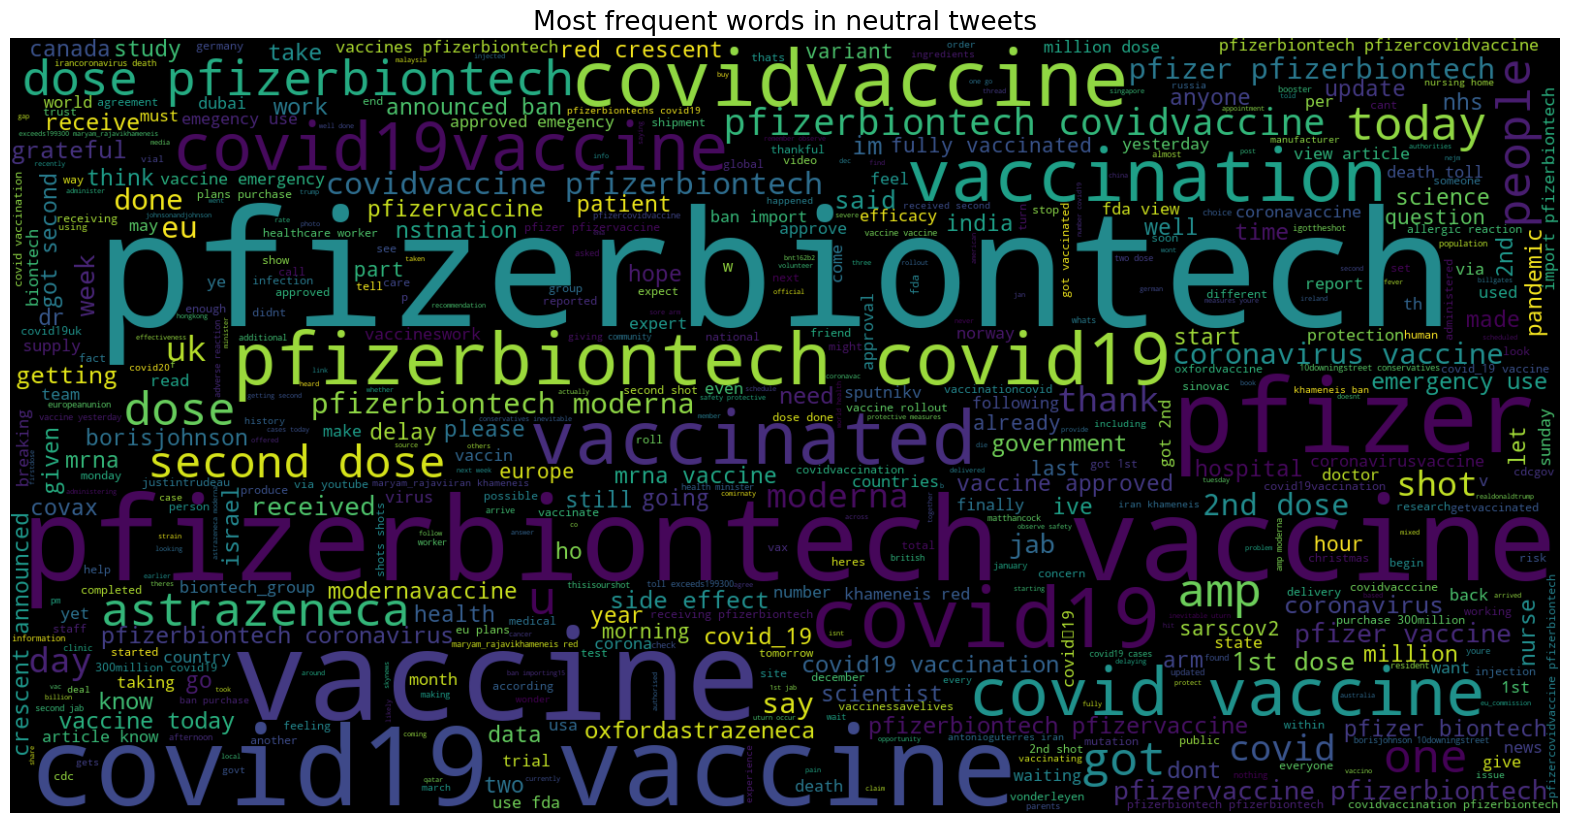

In [26]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [27]:
#Convert text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [28]:
feature_names = vect.get_feature_names_out()       
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 61105

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '004' '004 covid' '004 israelis' '02' '02 175'
 '02 adverse' '02012021' '02012021 grateful' '040120' '045' '045 ml'
 '045 pe' '05']


In [29]:
#Splits the data into training and testing sets.
from sklearn.model_selection import train_test_split

X = vect.transform(text_df['text'])
Y = text_df['sentiment']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (6460, 61105)
Size of y_train: (6460,)
Size of x_test: (1615, 61105)
Size of y_test: (1615,)


In [32]:
#Trains a logistic regression model using the training data. & Evaluates the model's performance on the test data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.47%


In [33]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 44 111  26]
 [  3 743   9]
 [  9 109 561]]


              precision    recall  f1-score   support

    Negative       0.79      0.24      0.37       181
     Neutral       0.77      0.98      0.86       755
    Positive       0.94      0.83      0.88       679

    accuracy                           0.83      1615
   macro avg       0.83      0.68      0.71      1615
weighted avg       0.84      0.83      0.82      1615



# Improve

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model & hyperparameters
logreg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

# Grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'C': 100000}


In [35]:
# Evaluate the best model's performance on the test data
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print("Test accuracy: {:.2f}%".format(acc*100))
    print(conf_matrix)
    print(f"\n{report}")

best_logreg = grid_search.best_estimator_
best_logreg_pred = best_logreg.predict(x_test)

evaluate_model(y_test, best_logreg_pred)


Test accuracy: 85.88%
[[ 64  95  22]
 [  3 743   9]
 [ 14  85 580]]

              precision    recall  f1-score   support

    Negative       0.79      0.35      0.49       181
     Neutral       0.80      0.98      0.89       755
    Positive       0.95      0.85      0.90       679

    accuracy                           0.86      1615
   macro avg       0.85      0.73      0.76      1615
weighted avg       0.86      0.86      0.85      1615

